In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pyscf
from pyscf import gto,scf,fci,lo,mcscf
from pyscf import ao2mo
from pyscf.tools import molden

/Users/zhendongli/.local/lib/python3.9/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [5]:
molname = 'h18'
natoms = 6
r = 4.0

mol = gto.Mole()
mol.verbose = 0

if molname == 'hchain':
    mol.atom = [['H',(0.0,0.0,i*r)] for i in range(natoms)]

elif molname == 'hplane':
    mol.atom = [['H',(0.,0.,0.)],
                ['H',(0.,0.,r)],
                ['H',(0.,0.,2*r)],
                ['H',(0.,r,0)],
                ['H',(0.,r,r)],
                ['H',(0.,r,2*r)]]

elif molname == 'hplane34':
    atom = []
    for i in range(3):
        for j in range(4):
            x = i * 4.0
            y = j * 4.0
            atom += [['H', (x, y, 0)]]
    mol.atom = atom
    mol.unit='bohr'
    
elif molname == 'hplane44':
    atom = []
    for i in range(4):
        for j in range(4):
            x = i * 4.0
            y = j * 4.0
            atom += [['H', (x, y, 0)]]
    mol.atom = atom
    mol.unit='bohr'

elif molname == 'n2':
    mol.atom = [['N',(0.,0.,0.)],
                ['N',(0.,0.,r)]]

elif molname == 'hf':
    mol.atom = [['H',(0.,0.,0.)],
                ['F',(0.,0.,r)]]

elif molname == 'c2':
    mol.atom = [['C',(0.,0.,0.)],
                ['C',(0.,0.,r)]]

elif molname == 'h18':
    atoms = []
    for k in range(2):
        for j in range(3):
            for i in range(3):
                x = i * r
                y = j * r
                z = k * r
                atoms += [['H', (x,y,z)]]
    mol.atom = atoms
    mol.unit = 'bohr'
    
mol.verbose = 5
mol.basis = 'sto-3g' 
mol.symmetry = True 
mol.charge = 0
mol.spin = 0
mol.build()

mf = scf.RHF(mol)
mf.init_guess = 'atom'
mf.level_shift = 0.0
mf.max_cycle = 100
mf.conv_tol=1.e-14
mf.scf()

System: uname_result(system='Darwin', node='Zhendongs-Macbook-Pro.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
numpy 1.24.2  scipy 1.9.3
Date: Wed Jun 19 14:04:55 2024
PySCF version 2.4.0
PySCF path  /Users/zhendongli/.local/lib/python3.9/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 18
[INPUT] num. electrons = 18
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry True subgroup None
[INPUT] Mole.unit = bohr
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 H      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr   0.0
[INPUT]  2 H   

-7.028188945252342

In [6]:
mf.mo_energy

array([-0.42167419, -0.33138054, -0.33138054, -0.27908009, -0.21345857,
       -0.20506417, -0.18591408, -0.17922047, -0.17922047,  0.03772418,
        0.03772418,  0.04127146,  0.0671877 ,  0.0875728 ,  0.15092407,
        0.17120044,  0.17120044,  0.25873482])

In [7]:
# from pyscf import mcscf, mrpt

# mc = mcscf.CASSCF(mf,4,4)
# ecas = mc.kernel()[0]
# ept2 = mrpt.NEVPT(mc).kernel()
# ecas, ecas + ept2

In [8]:
# mc = mcscf.CASSCF(mf,12,12)
# ecas = mc.kernel()[0]
# ept2 = mrpt.NEVPT(mc).kernel()
# ecas, ecas + ept2

In [9]:
# from pyscf import cc
# mycc = cc.CCSD(mf).run()
# print('CCSD total energy', mycc.e_tot)
# et = mycc.ccsd_t()
# print('CCSD(T) total energy', mycc.e_tot + et)

In [10]:
mo = 'oao'
if mo == 'cmo':
    mo_coeff = mf.mo_coeff
elif mo == 'oao':
    mo_coeff = lo.orth_ao(mol, method="meta-lowdin")
elif mo == 'lowdin':
    mo_coeff = lo.orth_ao(mol, method="lowdin")

molden.from_mo(mol, 'mo.molden', mo_coeff)

norb = mo_coeff.shape[1]
h1 = mo_coeff.T.dot(mf.get_hcore()).dot(mo_coeff)
eri = ao2mo.kernel(mol, mo_coeff)

irreps of each MO ['B2g' 'Ag' 'B1u' 'B2u' 'Ag' 'B2u' 'B1u' 'Ag' 'B2g' 'Ag' 'Ag' 'Au' 'B2u'
 'B1u' 'Ag' 'Ag' 'Ag' 'B1g']

WARN: orbitals [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] not symmetrized, norm = [0.125 0.25  0.125 0.25  0.5   0.25  0.125 0.25  0.125 0.125 0.25  0.125
 0.25  0.5   0.25  0.125 0.25  0.125]



In [11]:
# #
# # FCI
# #

# cisolver = fci.direct_spin1.FCI(mol)
# cisolver = pyscf.fci.addons.fix_spin(cisolver,shift=0.05,ss=0)
# cisolver.nroots = 2 #10
# norb = mol.nao
# nelec = [mol.nelectron//2,mol.nelectron//2]
# e, ci = cisolver.kernel(h1, eri, norb, nelec, ecore=mol.energy_nuc(), max_cycle=1000)
# e

In [12]:
eri = ao2mo.general(mol,(mo_coeff,mo_coeff,mo_coeff,mo_coeff),compact=0).reshape(norb,norb,norb,norb)

In [13]:
kij = np.einsum('ijji->ij',eri)

# 1. generate a 1D ordering

In [14]:
import fielder

forder = fielder.orbitalOrdering(kij,mode='kmat',debug=False)
forder

array([ 2, 11,  1, 10,  5, 14,  9,  0, 13,  4,  8, 17, 12,  3,  7, 16,  6,
       15])

In [15]:
import greedy

gorder0 = greedy.greedyOrdering(kij,iwt=0)[-1]
gorder1 = greedy.greedyOrdering(kij,iwt=1)[-1]

print(gorder0)
print(gorder1)

[13, 10, 11, 14, 17, 16, 15, 12, 9, 0, 3, 6, 7, 8, 5, 2, 1, 4]
[13, 10, 11, 14, 2, 5, 1, 4, 8, 17, 7, 16, 12, 15, 6, 3, 0, 9]


# 2. add connections to other sites based on weights on graph

In [16]:
import nxutils

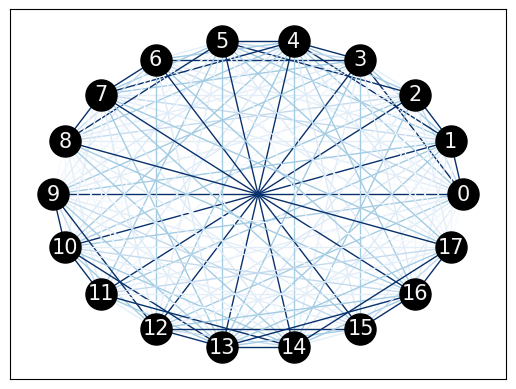

0

In [17]:
graph0 = nxutils.fromKijToGraph(kij)
nxutils.displayGraph(graph0,kij)

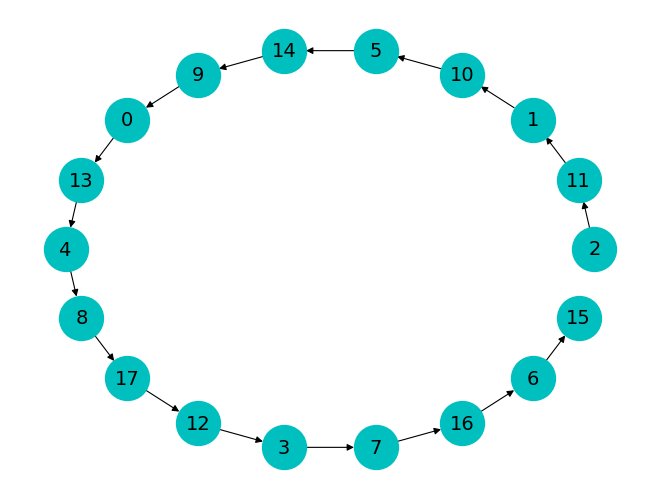

In [18]:
fgraph = nxutils.fromOrderToDiGraph(forder)
nxutils.displayCircular(fgraph)

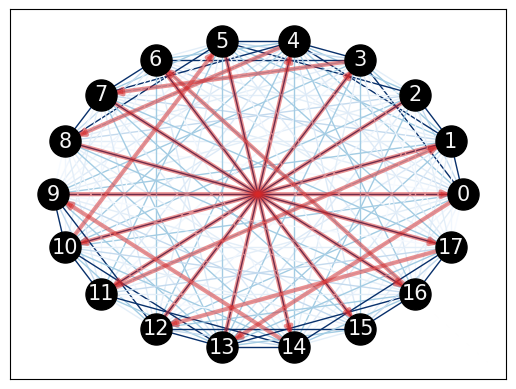

0

In [19]:
nxutils.displayGraphHighlight(graph0,kij,fgraph)

# User defined graph

In [20]:
import networkx as nx

# define the geomtry of lattice

edges = [[0,1],[1,2],
         [3,4],[4,5],
         [6,7],[7,8],
        [0,3],[1,4],[2,5],
        [3,6],[4,7],[5,8],
         [9,10],[10,11],
         [12,13],[13,14],
         [15,16],[16,17],
         [9,12],[10,13],[11,14],
         [12,15],[13,16],[14,17],
        [0,9],[1,10],[2,11],[3,12],[4,13],[5,14],[6,15],[7,16],[8,17]]

In [21]:
graph = nx.Graph()
graph.add_edges_from(edges)
nnodes = len(graph.nodes)

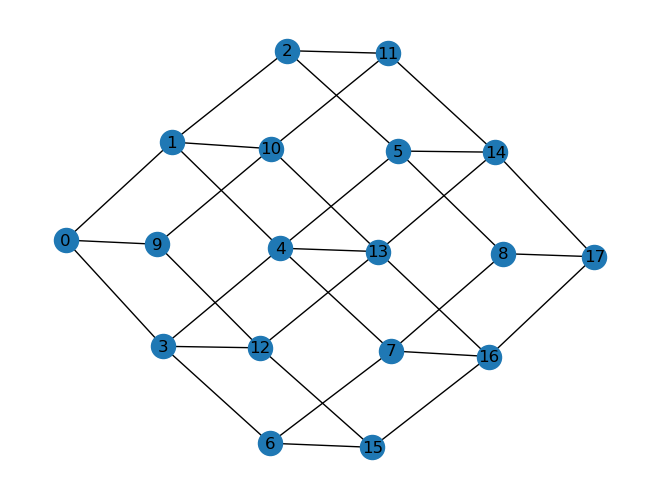

In [22]:
nx.draw_spring(graph, labels=dict(zip(range(nnodes),range(nnodes))))

forder= [ 2 11  1 10  5 14  9  0 13  4  8 17 12  3  7 16  6 15]


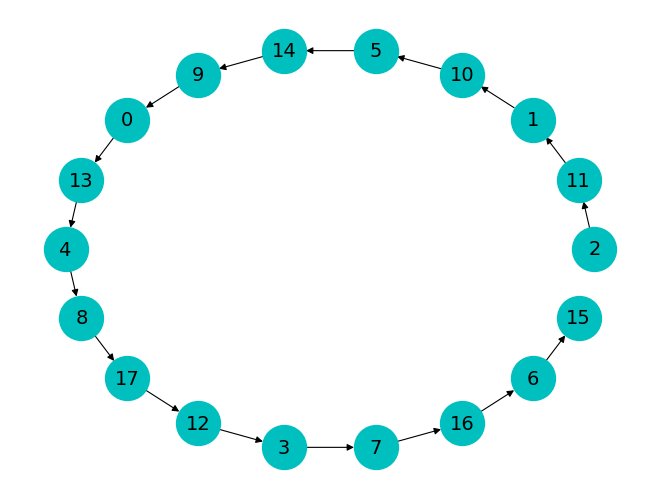

In [23]:
forder = fielder.orbitalOrdering(kij,'kmat')
print('forder=',forder)
fgraph = nxutils.fromOrderToDiGraph(forder)
nxutils.displayCircular(fgraph)

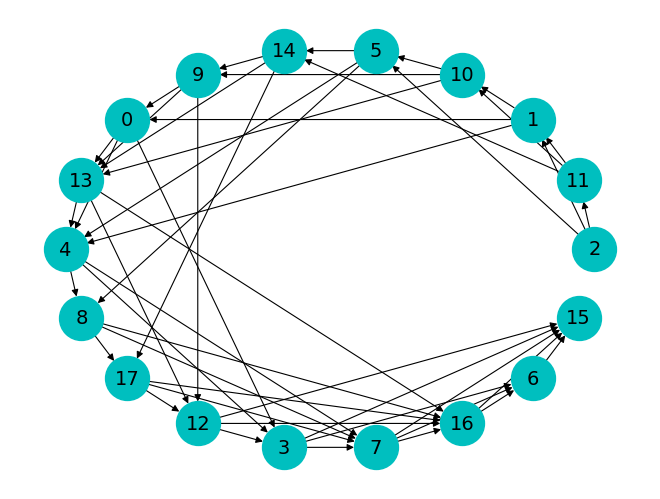

In [24]:
maxdes = 2
fgraph2 = nxutils.addEdgesByGreedySearch(fgraph,kij,maxdes)
nxutils.displayCircular(fgraph2)

# Highlight path on graph

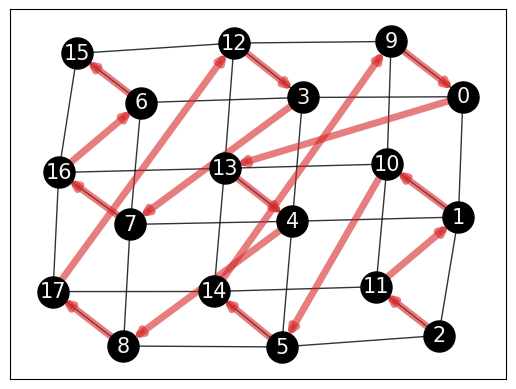

In [25]:
pos = nx.spring_layout(graph, seed=0)
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='black')
labels = dict(zip(graph.nodes,graph.nodes))
nx.draw_networkx_labels(graph, pos, labels, font_size=15, font_color="whitesmoke")
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.8)
nx.draw_networkx_edges(
    fgraph,
    pos,
    edgelist=list(fgraph.edges),
    edge_color="tab:red",
    width=5,
    alpha=0.6,
)
plt.show()

edgecomplement= [(11, 14), (11, 10), (2, 5), (2, 1), (14, 17), (14, 13), (5, 8), (5, 4), (10, 9), (10, 13), (1, 0), (1, 4), (17, 16), (17, 7), (8, 7), (8, 16), (13, 12), (13, 16), (4, 3), (4, 7), (9, 12), (9, 3), (0, 3), (0, 12), (16, 15), (16, 12), (7, 6), (7, 15), (3, 6), (3, 15), (12, 6)]


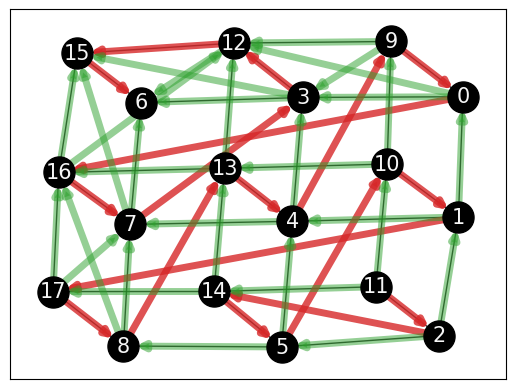

In [50]:
pos = nx.spring_layout(graph, seed=0)
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='black')
labels = dict(zip(graph.nodes,graph.nodes))
nx.draw_networkx_labels(graph, pos, labels, font_size=15, font_color="whitesmoke")
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.8)
nx.draw_networkx_edges(
    fgraph,
    pos,
    edgelist=list(fgraph.edges),
    edge_color="tab:red",
    width=5,
    alpha=0.8,
)
edgecomplement = [edge for edge in list(fgraph2.edges) if (edge[0],edge[1]) not in list(fgraph.edges) and (edge[1],edge[0]) not in list(fgraph.edges)]
print('edgecomplement=',edgecomplement)
nx.draw_networkx_edges(
    fgraph2,
    pos,
    edgelist=edgecomplement,
    edge_color="tab:green",
    width=5,
    alpha=0.5,
)
plt.show()